<a href="https://colab.research.google.com/github/nhunguet/GAN-NIDS/blob/main/GAN_model_for_NIDS_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Source and implement follow guide by Jason Brownlee,  https://machinelearningmastery.com/semi-supervised-generative-adversarial-network/

In [ ]:
#Mount to google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Link to folder
import os
os.chdir("/content/drive/My Drive/NIDS (DNP3-GOOSE)")

In [ ]:
# Deep Learning
# Library

from keras.models import Model

# Reading CSV
# -*- coding: utf-8 -*-
"""
Created on Tuesday  March  14:55:25 2021

@author: Nhung Nguyen
"""
import numpy as np
import pandas as pd

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras import Input, backend
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential, Model
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from keras.optimizers import Adam, SGD
#import keras.backend.tensorflow_backend as K
from math import sqrt
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
#mine
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import keras
from keras import utils
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

from scipy import interp
from sklearn.metrics import roc_auc_score

# New Section

In [ ]:
train_df = pd.read_csv('extracted_dataset_DNP32.csv')

scalers = {}
train_X = None
data = []
le = preprocessing.LabelEncoder()
for col_name in ('tot_dnp3_payload_len', 'rttd','min_payload_len','dst_bytes','flag','contains_dnp3_pckt',
                 'srv_count','dst_host_count','func_code_not_supported_count','dst_host_same_srv_rate',
                 'src_bytes','count'):

#for col_name in ('path', 't','state','seq','data_cnt'):

    if train_df[col_name].dtypes == object or train_df[col_name].dtypes == bool :
        train_df[col_name] = le.fit_transform(train_df[col_name]) 
    scalers[col_name] = MinMaxScaler(feature_range=(0, 1))
    data.append(scalers[col_name].fit_transform(np.array(train_df[col_name]).reshape(-1, 1)).reshape(-1))

train_X = np.column_stack(data)
train_X_rs = train_X.reshape(train_X.shape[0],train_X.shape[1])

Y = list(train_df['label'])
for i in range(len(Y)):
    if Y[i] == 'normal':
        Y[i] = 0.0 
    elif Y[i] == 'dos':
        Y[i] = 1.0 
    else:
        Y[i] = 1.0 # convert 'dos' to 1.0, other things to 0.0
Y = np.array(Y)



#train_X, X_test, Y, y_test = train_test_split(train_X, Y, test_size = 0.20)


In [ ]:
from sklearn.svm import LinearSVC
#from sklearn import cross_validation
#from sklearn.metrics import top_k_accuracy_score
from sklearn import metrics

X_train, X_test, y_train, y_test =  train_test_split(train_X, Y, test_size=0.1)
#svmClassifier = LinearSVC(random_state=11)
#svmClassifier.fit(X_train, y_train)
#y_pred = svmClassifier.predict(X_test)
#metrics.accuracy_score(y_test, y_pred, normalize=True)

In [ ]:
#SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(train_X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(774, 12)
(774,)


In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

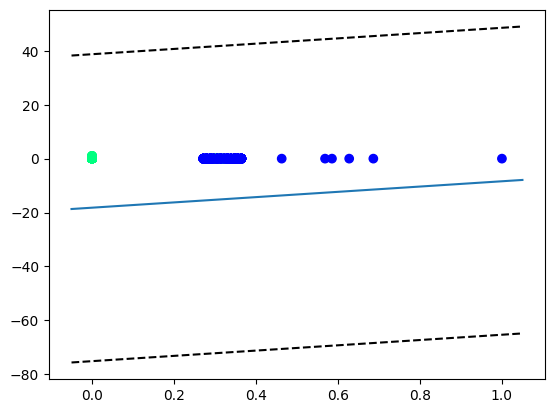

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

In [ ]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[41,  0],
       [ 2, 44]])

In [ ]:
# data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X_rs, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
                                                    # stratify = y: means make train and test set have same distribution

(688, 12)
(688,)


In [ ]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (688, 12)
y_train:  (688,)
X_test:  (173, 12)
y_test:  (173,)


In [ ]:
####GAN MODEL


In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import LeakyReLU, ReLU
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.optimizers import Adam, RMSprop
from keras.utils.vis_utils import plot_model

from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers import Lambda
from keras.layers import Activation

from matplotlib import pyplot
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras import backend
from keras.initializers import RandomNormal
%matplotlib inline

In [ ]:

#===============================================================================================Custom 
# custom activation function
def custom_activation(output):
    logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
    result = logexpsum / (logexpsum + 1.0)
    return result

# Define some loss and optimizer function
Category_loss = 'sparse_categorical_crossentropy'
Binary_loss = 'binary_crossentropy'

# Adam optimazation
def Adam_optimizer():
    return Adam(lr = 0.0002, beta_1 = 0.5)

# RMS optimazation
def RMS_optimizer():
    return RMSprop(lr = 0.0002, decay = 6e-8)


#===============================================================================================Create discriminator ================================

# define the standalone supervised and unsupervised discriminator models
def define_discriminator(in_shape=(12, 1), n_classes=2):
     # weight initialization
    init = RandomNormal(stddev=0.02)
    # image input
    in_image = Input(shape=in_shape, name = 'Input')
    
    # downsample to 
    fe = Conv1D(128, 3, strides = 2, padding='same', kernel_initializer=init, name='conv2d_1')(in_image)
    fe = LeakyReLU(alpha=0.2, name='Leaky_ReLU_1')(fe)
    fe = Dropout(0.3, name='drop_1')(fe)
    
    # normal
    fe = Conv1D(128, 3, strides = 2, padding='same', kernel_initializer=init, name='conv2d_2')(fe)
    fe = BatchNormalization(name='Bat_Norm_1')(fe)
    fe = LeakyReLU(alpha=0.2, name='Leaky_ReLU_2')(fe)
    fe = Dropout(0.3, name='drop_2')(fe)
    
    # downsample to
    fe = Conv1D(128, 3, strides = 2, padding='same', kernel_initializer=init, name='conv2d_3')(fe)
    fe = BatchNormalization(name='Bat_Norm_2')(fe)
    fe = LeakyReLU(alpha=0.2, name='Leaky_ReLU_3')(fe)
    fe = Dropout(0.3, name='drop_3')(fe)
    
    # # normal
    fe = Conv1D(256,3, padding='same', kernel_initializer=init, name='conv2d_4')(fe)
    fe = BatchNormalization(name='Bat_Norm_3')(fe)
    fe = LeakyReLU(alpha=0.2, name='Leaky_ReLU_4')(fe)
    fe = Dropout(0.3, name='drop_4')(fe)
    
    # normal
    fe = Conv1D(256,5, padding='same', kernel_initializer=init, name='conv2d_5')(fe)
    fe = BatchNormalization(name='Bat_Norm_4')(fe)
    fe = LeakyReLU(alpha=0.2, name='Leaky_ReLU_5')(fe)
    fe = Dropout(0.3, name='drop_5')(fe)
    
    # flatten feature maps
    fe = Flatten(name='Flatten_1')(fe)
    
    # dropout
    fe = Dropout(0.4)(fe)
    
    # output layer nodes
    fe = Dense(n_classes)(fe)
    
    # supervised output
    c_out_layer = Activation('softmax')(fe)
    # define and compile  discriminator model
    c_model = Model(in_image, c_out_layer)
    c_model.compile(loss=Category_loss, optimizer=Adam_optimizer(), metrics=['accuracy'])
    
    # unsupervised output
    d_out_layer = Lambda(custom_activation)(fe)
    # define and compile unsupervised discriminator model
    d_model = Model(in_image, d_out_layer)
    d_model.compile(loss=Binary_loss, optimizer=Adam_optimizer())
    
    return d_model, c_model


#=============================================created gennerator ===================================================

# define the standalone generator model
def define_generator(latent_dim):
    # weight initialization
    init = RandomNormal(stddev=0.02)
    depth = 1 #32
    ks = 3
    dropout = 0.25
    dim = 12 #

    # label input
    in_label = Input(shape=(1,))
    
    # embedding for categorical input
    li = Embedding(2, 50)(in_label)# ?
    
    # linear multiplication
    n_nodes = 12 * 1
    li = Dense(n_nodes)(li)
    
    # reshape to additional channel
    li = Reshape((12, 1, 1))(li)
    
    # image generator input
    in_lat = Input(shape=(latent_dim,))
    # image generator input
    in_lat = Input(shape=(latent_dim,), name='Generator_Input')
    # foundation for 12x1
    
    gen = Dense(n_nodes, kernel_initializer=init, name='dense_4')(in_lat)
    gen = Activation('relu', name='activation_1')(gen)
    gen = Reshape((dim, 1, depth), name='reshape_2')(gen)
    
    # upsample to 
    gen = Conv2DTranspose(24, (5,5), strides=(1,1), padding='same', kernel_initializer=init, name='conv2d_transpose_1')(gen)
    gen = BatchNormalization(name='Bat_Norm_5')(gen)
    gen = Activation('relu', name='activation_2')(gen)
    
    # upsample to 
    gen = Conv2DTranspose(1, (5,5), strides=(1,1), padding='same', kernel_initializer=init, name='conv2d_transpose_2')(gen)
    
    # output    
    out_layer = Activation('tanh', name='activation_3')(gen)
    
    # define model
    model = Model(in_lat, out_layer)
    
    return model


#========================================================================Define_gan========================

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    
    # connect image output from generator as input to discriminator
    gan_output = d_model(g_model.output)
    
    # define gan model as taking noise and outputting a classification
    model = Model(g_model.input, gan_output)
    
    # compile model
    model.compile(loss=Binary_loss, optimizer=Adam_optimizer())
    
    return model


#define more function

# load Data
def load_real_samples():
    # load dataset
    (trainX, trainy) = (X_train, y_train)
    
    # expand to 3d, e.g. add channels
    X = expand_dims(trainX, axis=-1)
    
    print('Shape of training dataset: ', 'X_train: ',X.shape, 'y_train: ',trainy.shape)
    return [X, trainy]

# select a supervised subset of the dataset, ensures classes are balanced
def select_supervised_samples(dataset, n_samples=800, n_classes=2):
    X, y = dataset
    X_list, y_list = list(), list()
    n_per_class = int(n_samples / n_classes)
    for i in range(n_classes):
        # get all images for this class
        X_with_class = X[y == i]
        # choose random instances
        ix = randint(0, len(X_with_class), n_per_class)
        # add to list
        [X_list.append(X_with_class[j]) for j in ix]
        [y_list.append(i) for j in ix]
    return asarray(X_list), asarray(y_list)

# select real samples
def generate_real_samples(dataset, n_samples):
    # split into images and labels
    images, labels = dataset
    # choose random instances
    ix = randint(0, images.shape[0], n_samples)
    # select images and labels
    X, labels = images[ix], labels[ix]
    # generate class labels
    y = ones((n_samples, 1))
    return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    z_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = z_input.reshape(n_samples, latent_dim)
    return z_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    # generate points in latent space
    z_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    images = generator.predict(z_input)
    # create class labels
    y = zeros((n_samples, 1))
    return images, y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, c_model, latent_dim, dataset, n_samples=50):
    # prepare fake examples
    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    
    # evaluate the classifier model
    X, y = dataset
    _, acc = c_model.evaluate(X, y, verbose=0)
    print('Classifier Accuracy: %.3f%%' % (acc * 100))
    
    # save the generator model
    filename1 = 'g_model_SGAN_%04d.h5' % (step+1)
    g_model.save('Save_Model/SGAN/' + filename1)
    
    # save the classifier model
    filename2 = 'c_model_SGAN_%04d.h5' % (step+1)
    c_model.save('Save_Model/SGAN/' + filename2)
    print('>>Saved: %s, and %s' % (filename1, filename2))
    print()
#train model 

# train the generator and discriminator
def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=100):
    # select supervised dataset
    X_sup, y_sup = select_supervised_samples(dataset)
    print('Supervised dataset: ', X_sup.shape, y_sup.shape)
    
    # calculate the number of batches per training epoch
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    
    # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs
    
    # calculate the size of half a batch of samples
    half_batch = int(n_batch / 2)
    print('n_epochs = %d, n_batch = %d, half_batch = %d, bat_per_epo = %d, steps = %d' % (n_epochs, n_batch, half_batch, bat_per_epo, n_steps))
    
    # manually enumerate epochs
    for i in range(n_steps):
        # update supervised discriminator (c)
        [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
        c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
        
        # update unsupervised discriminator (d)
        [X_real, _], y_real = generate_real_samples(dataset, half_batch)
        d_loss1 = d_model.train_on_batch(X_real, y_real)
        
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_loss2 = d_model.train_on_batch(X_fake, y_fake)
        
        # update generator (g)
        X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(X_gan, y_gan)
        
        # summarize loss on this batch
        print('step: %d,  c[%.3f, %.0f],  d[%.3f, %.3f],  g[%.3f]' % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))
        
        # evaluate the model performance every so often
        if (i+1) % (bat_per_epo * 1) == 0:
            summarize_performance(i, g_model, c_model, latent_dim, dataset)

In [ ]:
#==========================================Train Model=========================================

# size of the latent space
latent_dim = 100

# create the discriminator models
d_model, c_model = define_discriminator()

# create the generator
g_model = define_generator(latent_dim)

# create the gan
gan_model = define_gan(g_model, d_model)

# load image data
dataset = load_real_samples()

# train model
train(g_model, d_model, c_model, gan_model, dataset, latent_dim)

Shape of training dataset:  X_train:  (688, 12, 1) y_train:  (688,)
Supervised dataset:  (800, 12, 1) (800,)
n_epochs = 50, n_batch = 100, half_batch = 50, bat_per_epo = 6, steps = 300
step: 1,  c[1.034, 56],  d[0.317, 1.850],  g[0.407]
step: 2,  c[0.399, 82],  d[0.232, 1.511],  g[0.409]
step: 3,  c[0.255, 86],  d[0.242, 1.126],  g[0.411]
step: 4,  c[0.103, 98],  d[0.238, 0.773],  g[0.413]
step: 5,  c[0.044, 100],  d[0.125, 0.473],  g[0.416]
step: 6,  c[0.257, 94],  d[0.178, 0.376],  g[0.418]
Classifier Accuracy: 45.058%
>>Saved: g_model_SGAN_0006.h5, and c_model_SGAN_0006.h5

step: 7,  c[0.666, 48],  d[0.169, 0.323],  g[0.419]
step: 8,  c[0.021, 100],  d[0.055, 0.223],  g[0.422]
step: 9,  c[0.177, 98],  d[0.087, 0.159],  g[0.423]
step: 10,  c[0.003, 100],  d[0.135, 0.124],  g[0.427]
step: 11,  c[0.080, 98],  d[0.029, 0.124],  g[0.428]
step: 12,  c[0.157, 98],  d[0.055, 0.070],  g[0.428]
Classifier Accuracy: 45.058%
>>Saved: g_model_SGAN_0012.h5, and c_model_SGAN_0012.h5

step: 13,  c[

In [ ]:
# load the model#==========================================Test Model=========================================

# example of loading the classifier model and generating images
from keras.models import load_model

# load the model
gan_model = load_model('Save_Model/SGAN/c_model_SGAN_0300.h5')
gan_model.summary()
# # load the dataset
(trainX, trainy), (testX, testy) = (X_train, y_train), (X_test, y_test)

# # expand to 3d, e.g. add channels
trainX = expand_dims(trainX, axis=-1)
testX = expand_dims(testX, axis=-1)

# # evaluate the model
_, train_acc = gan_model.evaluate(trainX, trainy, verbose=0)
print('Train Accuracy: %.3f%%' % (train_acc * 100))

_, test_acc = gan_model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 12, 1)]           0         
_________________________________________________________________
conv2d_1 (Conv1D)            (None, 6, 128)            512       
_________________________________________________________________
Leaky_ReLU_1 (LeakyReLU)     (None, 6, 128)            0         
_________________________________________________________________
drop_1 (Dropout)             (None, 6, 128)            0         
_________________________________________________________________
conv2d_2 (Conv1D)            (None, 3, 128)            49280     
_________________________________________________________________
Bat_Norm_1 (BatchNormalizati (None, 3, 128)            512       
_________________________________________________________________
Leaky_ReLU_2 (LeakyReLU)     (None, 3, 128)            0   

In [ ]:
# Test model
test_model = gan_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.9942


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    mpl.rcParams.update(mpl.rcParamsDefault)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
    plt.figure(figsize=(5, 5)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.75)
    tick_marks = np.arange(len(list(range(cm.shape[0]))))
#     plt.xticks(tick_marks, classes, rotation=45)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes,rotation=90)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    return plt


Normalized confusion matrix
[[1.         0.        ]
 [0.01234568 0.98765432]]


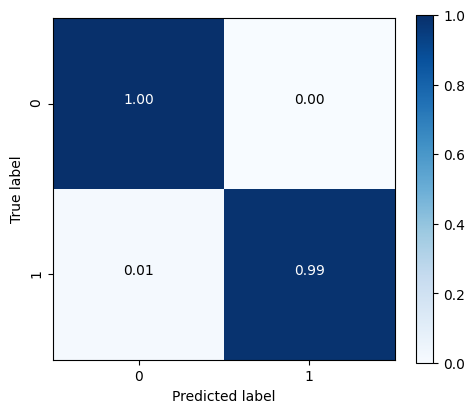

In [ ]:
pred = np.argmax(gan_model.predict(testX), axis=1).reshape(-1,1)
# utils.confusion_plot(pred,data.y_test)
plot_confusion_matrix(confusion_matrix(testy,pred),  normalize=True,title=None)
plt.savefig("confusion matrixa.pdf")

In [ ]:
plt.show()

In [ ]:
!pip install pyshark
import pyshark
cap = pyshark.FileCapture('goose.pcapng')